In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string
string.punctuation
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
comic = pd.read_csv('Webtoon Dataset.csv')

In [ ]:
comic.shape

(569, 10)

In [ ]:
comic.head(1)

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...


In [ ]:
comic.describe()

,id,Rating
count,569.000000,569.000000
mean,284.000000,9.418998
std,164.400426,0.557571
min,0.000000,5.410000
25%,142.000000,9.310000
50%,284.000000,9.580000
75%,426.000000,9.730000
max,568.000000,9.930000


In [ ]:
comic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            569 non-null    int64  
 1   Name          569 non-null    object 
 2   Writer        568 non-null    object 
 3   Likes         569 non-null    object 
 4   Genre         569 non-null    object 
 5   Rating        569 non-null    float64
 6   Subscribers   569 non-null    object 
 7   Summary       569 non-null    object 
 8   Update        569 non-null    object 
 9   Reading Link  569 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 44.6+ KB


In [ ]:
#selection data
df1 = comic[['Rating', 'Genre', 'Summary']]
df1.head()

,Rating,Genre,Summary
0,9.62,Romance,"She's young, single and about to achieve her d..."
1,9.60,Romance,"After binge-watching beauty videos online, a s..."
2,9.81,Romance,After making a grisly discovery in the country...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...
4,9.85,Supernatural,When vampires destroy her chance to have the n...


In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df1['Clean_Summary'] = df1['Summary'].apply(lambda x:remove_punctuation(x))
df1.head()

<ipython-input-12-f0392fcb2f28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Clean_Summary'] = df1['Summary'].apply(lambda x:remove_punctuation(x))


,Rating,Genre,Summary,Clean_Summary
0,9.62,Romance,"She's young, single and about to achieve her d...",Shes young single and about to achieve her dre...
1,9.60,Romance,"After binge-watching beauty videos online, a s...",After bingewatching beauty videos online a shy...
2,9.81,Romance,After making a grisly discovery in the country...,After making a grisly discovery in the country...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...,Shes a hopeless romantic whos turning 30s and...
4,9.85,Supernatural,When vampires destroy her chance to have the n...,When vampires destroy her chance to have the n...


In [ ]:
#setting lower case
df1['Summary_Lower'] = df1['Clean_Summary'].apply(lambda x: x.lower())
df1.head()

<ipython-input-13-e38816d3fb09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Summary_Lower'] = df1['Clean_Summary'].apply(lambda x: x.lower())


,Rating,Genre,Summary,Clean_Summary,Summary_Lower
0,9.62,Romance,"She's young, single and about to achieve her d...",Shes young single and about to achieve her dre...,shes young single and about to achieve her dre...
1,9.60,Romance,"After binge-watching beauty videos online, a s...",After bingewatching beauty videos online a shy...,after bingewatching beauty videos online a shy...
2,9.81,Romance,After making a grisly discovery in the country...,After making a grisly discovery in the country...,after making a grisly discovery in the country...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...,Shes a hopeless romantic whos turning 30s and...,shes a hopeless romantic whos turning 30s and...
4,9.85,Supernatural,When vampires destroy her chance to have the n...,When vampires destroy her chance to have the n...,when vampires destroy her chance to have the n...


In [ ]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

#applying function to the column
df1['Summary_Tokenized'] = df1['Summary_Lower'].apply(lambda x: tokenization(x))
df1.head()

<ipython-input-14-9fbfd7699674>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Summary_Tokenized'] = df1['Summary_Lower'].apply(lambda x: tokenization(x))


,Rating,Genre,Summary,Clean_Summary,Summary_Lower,Summary_Tokenized
0,9.62,Romance,"She's young, single and about to achieve her d...",Shes young single and about to achieve her dre...,shes young single and about to achieve her dre...,[shes young single and about to achieve her dr...
1,9.60,Romance,"After binge-watching beauty videos online, a s...",After bingewatching beauty videos online a shy...,after bingewatching beauty videos online a shy...,[after bingewatching beauty videos online a sh...
2,9.81,Romance,After making a grisly discovery in the country...,After making a grisly discovery in the country...,after making a grisly discovery in the country...,[after making a grisly discovery in the countr...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...,Shes a hopeless romantic whos turning 30s and...,shes a hopeless romantic whos turning 30s and...,[shes a hopeless romantic whos turning 30s an...
4,9.85,Supernatural,When vampires destroy her chance to have the n...,When vampires destroy her chance to have the n...,when vampires destroy her chance to have the n...,[when vampires destroy her chance to have the ...


In [ ]:
df1.iloc[0].tolist()

[9.62,
 'Romance',
 "She's young, single and about to achieve her dream of creating incredible videogames. But then life throws her a one-two punch: a popular streamer gives her first game a scathing review. Even worse she finds out that same troublesome critic is now her new neighbor! A funny, sexy and all-too-real story about gaming, memes and social anxiety. Come for the plot, stay for the doggo.",
 'Shes young single and about to achieve her dream of creating incredible videogames But then life throws her a onetwo punch a popular streamer gives her first game a scathing review Even worse she finds out that same troublesome critic is now her new neighbor A funny sexy and alltooreal story about gaming memes and social anxiety Come for the plot stay for the doggo',
 'shes young single and about to achieve her dream of creating incredible videogames but then life throws her a onetwo punch a popular streamer gives her first game a scathing review even worse she finds out that same troub

In [ ]:
#stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
df1['No_Stopwords'] = df1['Summary_Tokenized'].apply(lambda x:remove_stopwords(x))
df1.head()

<ipython-input-17-1af5a07926fe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['No_Stopwords'] = df1['Summary_Tokenized'].apply(lambda x:remove_stopwords(x))


,Rating,Genre,Summary,Clean_Summary,Summary_Lower,Summary_Tokenized,No_Stopwords
0,9.62,Romance,"She's young, single and about to achieve her d...",Shes young single and about to achieve her dre...,shes young single and about to achieve her dre...,[shes young single and about to achieve her dr...,[shes young single and about to achieve her dr...
1,9.60,Romance,"After binge-watching beauty videos online, a s...",After bingewatching beauty videos online a shy...,after bingewatching beauty videos online a shy...,[after bingewatching beauty videos online a sh...,[after bingewatching beauty videos online a sh...
2,9.81,Romance,After making a grisly discovery in the country...,After making a grisly discovery in the country...,after making a grisly discovery in the country...,[after making a grisly discovery in the countr...,[after making a grisly discovery in the countr...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...,Shes a hopeless romantic whos turning 30s and...,shes a hopeless romantic whos turning 30s and...,[shes a hopeless romantic whos turning 30s an...,[shes a hopeless romantic whos turning 30s an...
4,9.85,Supernatural,When vampires destroy her chance to have the n...,When vampires destroy her chance to have the n...,when vampires destroy her chance to have the n...,[when vampires destroy her chance to have the ...,[when vampires destroy her chance to have the ...


In [ ]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

df1['Summary_Stemmed'] = df1['No_Stopwords'].apply(lambda x: stemming(x))
df1.head()

<ipython-input-18-3837e6761ac5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Summary_Stemmed'] = df1['No_Stopwords'].apply(lambda x: stemming(x))


,Rating,Genre,Summary,Clean_Summary,Summary_Lower,Summary_Tokenized,No_Stopwords,Summary_Stemmed
0,9.62,Romance,"She's young, single and about to achieve her d...",Shes young single and about to achieve her dre...,shes young single and about to achieve her dre...,[shes young single and about to achieve her dr...,[shes young single and about to achieve her dr...,[shes young single and about to achieve her dr...
1,9.60,Romance,"After binge-watching beauty videos online, a s...",After bingewatching beauty videos online a shy...,after bingewatching beauty videos online a shy...,[after bingewatching beauty videos online a sh...,[after bingewatching beauty videos online a sh...,[after bingewatching beauty videos online a sh...
2,9.81,Romance,After making a grisly discovery in the country...,After making a grisly discovery in the country...,after making a grisly discovery in the country...,[after making a grisly discovery in the countr...,[after making a grisly discovery in the countr...,[after making a grisly discovery in the countr...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...,Shes a hopeless romantic whos turning 30s and...,shes a hopeless romantic whos turning 30s and...,[shes a hopeless romantic whos turning 30s an...,[shes a hopeless romantic whos turning 30s an...,[shes a hopeless romantic whos turning 30s an...
4,9.85,Supernatural,When vampires destroy her chance to have the n...,When vampires destroy her chance to have the n...,when vampires destroy her chance to have the n...,[when vampires destroy her chance to have the ...,[when vampires destroy her chance to have the ...,[when vampires destroy her chance to have the ...


In [ ]:
df1.iloc[0].tolist()

[9.62,
 'Romance',
 "She's young, single and about to achieve her dream of creating incredible videogames. But then life throws her a one-two punch: a popular streamer gives her first game a scathing review. Even worse she finds out that same troublesome critic is now her new neighbor! A funny, sexy and all-too-real story about gaming, memes and social anxiety. Come for the plot, stay for the doggo.",
 'Shes young single and about to achieve her dream of creating incredible videogames But then life throws her a onetwo punch a popular streamer gives her first game a scathing review Even worse she finds out that same troublesome critic is now her new neighbor A funny sexy and alltooreal story about gaming memes and social anxiety Come for the plot stay for the doggo',
 'shes young single and about to achieve her dream of creating incredible videogames but then life throws her a onetwo punch a popular streamer gives her first game a scathing review even worse she finds out that same troub

SENTIMENT ANALYSIS

In [ ]:
#selection data
df2 = df1[['Rating', 'Genre', 'Clean_Summary']]
df2.head()

,Rating,Genre,Clean_Summary
0,9.62,Romance,Shes young single and about to achieve her dre...
1,9.60,Romance,After bingewatching beauty videos online a shy...
2,9.81,Romance,After making a grisly discovery in the country...
3,9.79,Romance,Shes a hopeless romantic whos turning 30s and...
4,9.85,Supernatural,When vampires destroy her chance to have the n...


In [ ]:
#create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#apply function to data
df2['Subjectivity'] = df2['Clean_Summary'].apply(getSubjectivity)
df2['Polarity'] = df2['Clean_Summary'].apply(getPolarity)
df2.head()

<ipython-input-21-9d8f8b3ad217>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Subjectivity'] = df2['Clean_Summary'].apply(getSubjectivity)
<ipython-input-21-9d8f8b3ad217>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Polarity'] = df2['Clean_Summary'].apply(getPolarity)


,Rating,Genre,Clean_Summary,Subjectivity,Polarity
0,9.62,Romance,Shes young single and about to achieve her dre...,0.568756,0.099867
1,9.60,Romance,After bingewatching beauty videos online a shy...,0.574074,-0.012963
2,9.81,Romance,After making a grisly discovery in the country...,0.566667,-0.250000
3,9.79,Romance,Shes a hopeless romantic whos turning 30s and...,0.680952,0.471429
4,9.85,Supernatural,When vampires destroy her chance to have the n...,0.450000,-0.125000


In [ ]:
[df2.iloc[0].tolist(),df2.iloc[1].tolist()]

[[9.62,
  'Romance',
  'Shes young single and about to achieve her dream of creating incredible videogames But then life throws her a onetwo punch a popular streamer gives her first game a scathing review Even worse she finds out that same troublesome critic is now her new neighbor A funny sexy and alltooreal story about gaming memes and social anxiety Come for the plot stay for the doggo',
  0.5687562437562437,
  0.09986679986679986],
 [9.6,
  'Romance',
  'After bingewatching beauty videos online a shy comic book fan masters the art of makeup and sees her social standing skyrocket as she becomes her schools prettiest pretty girl overnight But will her elite status be shortlived How long can she keep her real self a secret And what about that cute boy who knows her secret',
  0.5740740740740741,
  -0.012962962962962966]]

In [ ]:
#create function to get sentiment data
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#apply function to data
df2['Sentiment'] = df2['Polarity'].apply(getSentiment)
df2.head()

<ipython-input-26-1b6178dccd86>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sentiment'] = df2['Polarity'].apply(getSentiment)


,Rating,Genre,Clean_Summary,Subjectivity,Polarity,Sentiment
0,9.62,Romance,Shes young single and about to achieve her dre...,0.568756,0.099867,Positive
1,9.60,Romance,After bingewatching beauty videos online a shy...,0.574074,-0.012963,Negative
2,9.81,Romance,After making a grisly discovery in the country...,0.566667,-0.250000,Negative
3,9.79,Romance,Shes a hopeless romantic whos turning 30s and...,0.680952,0.471429,Positive
4,9.85,Supernatural,When vampires destroy her chance to have the n...,0.450000,-0.125000,Negative


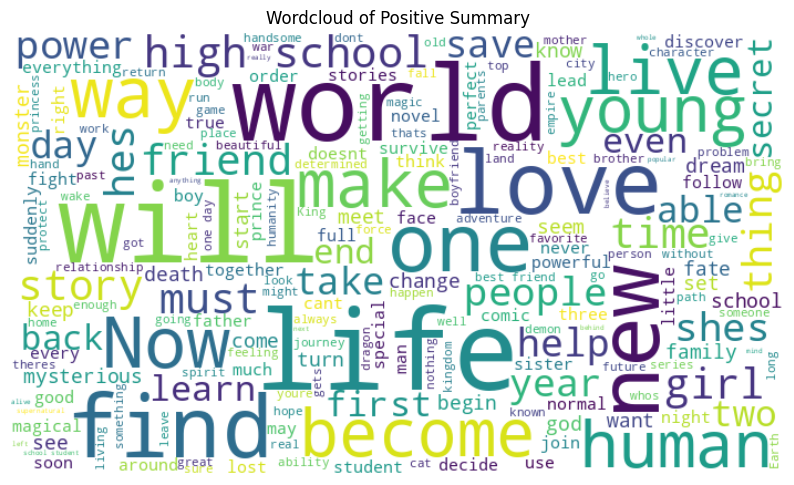

In [ ]:
positive = " ".join(df2[df2.Sentiment == 'Positive']['Clean_Summary'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(positive)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Positive Summary")
plt.axis('off')
plt.show()

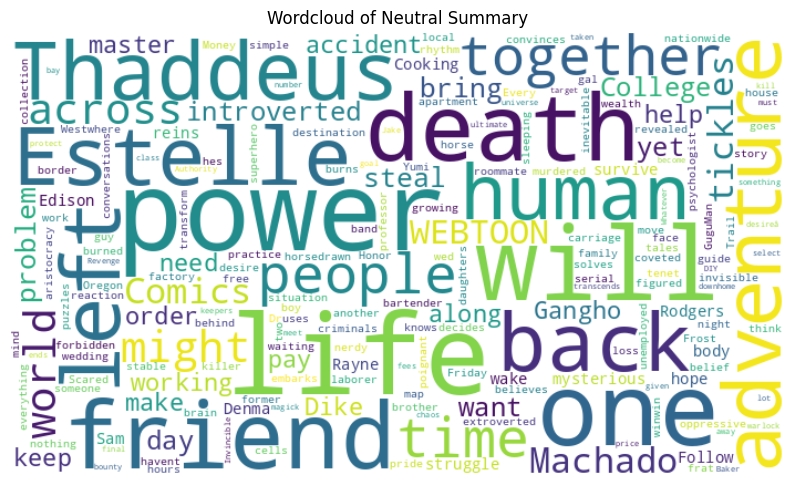

In [ ]:
neutral = " ".join(df2[df2.Sentiment == 'Neutral']['Clean_Summary'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Neutral Summary")
plt.axis('off')
plt.show()

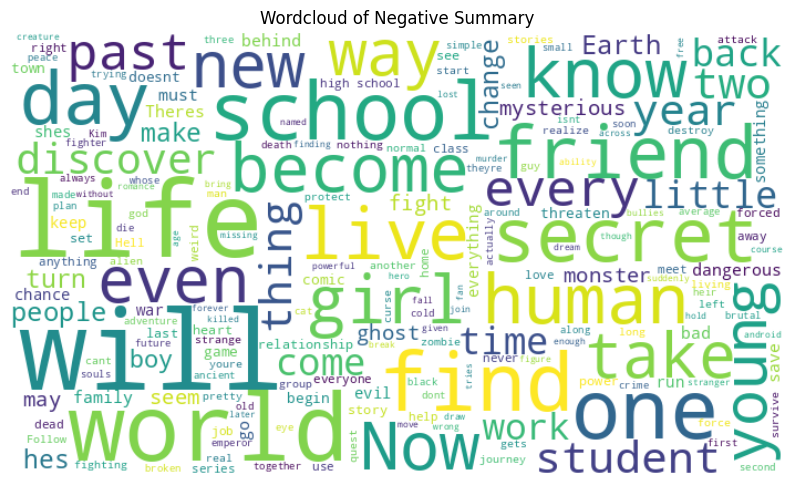

In [ ]:
negative = " ".join(df2[df2.Sentiment == 'Negative']['Clean_Summary'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(negative)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Negative Summary")
plt.axis('off')
plt.show()